In [370]:
import pandas as pd

In [371]:
df = pd.read_csv(r"C:\Users\rishi\Desktop\github task\student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


PREPROCESSING

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [373]:
df.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [374]:
df.shape

(500, 3)

now plotting scatter plot between previous exam score and if person will pass or not at the moment.

In [375]:
import matplotlib.pyplot as plt

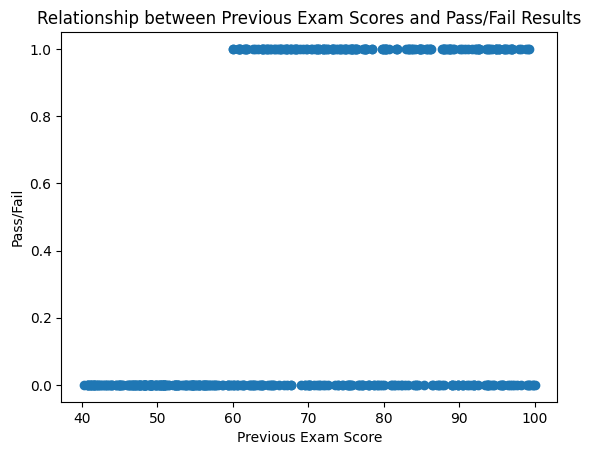

In [376]:
plt.title("Relationship between Previous Exam Scores and Pass/Fail Results")
plt.xlabel("Previous Exam Score")
plt.ylabel("Pass/Fail")
x = df["Previous Exam Score"]
y = df["Pass/Fail"]
plt.scatter(x,y)

now we will split into training and testing

In [377]:
X = df.drop("Pass/Fail",axis = 1)
y = df["Pass/Fail"]

In [378]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

now we will do scaling

In [379]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [380]:
X_train_scaled = se.fit_transform(X_train)
X_test_scaled = se.fit_transform(X_test)

now we will implement it using different algorithms.

In [381]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()

In [382]:
le.fit(X_train_scaled,y_train)

LogisticRegression()

In [383]:
le.score(X_test_scaled,y_test)

0.89

now we will implement for knn

In [384]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [385]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [386]:
knn.score(X_test_scaled,y_test)

0.99

plotting confusion matrix for knn model.

In [387]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  0],
       [ 1, 34]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

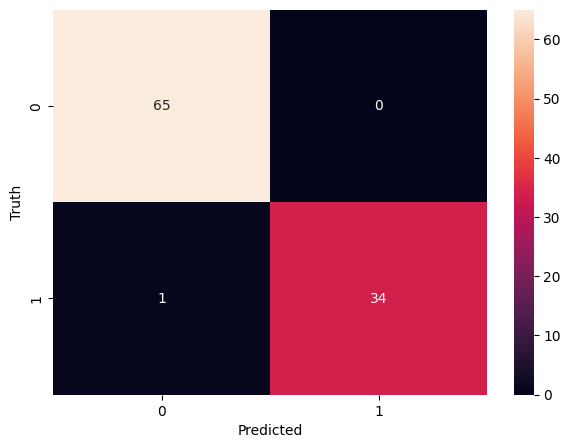

In [388]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')